In [1]:
import requests as rq
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from TCGA_files import *
#from ensembleAPI import geneinfo, genesinfo
from sklearn import metrics
from hsbmpy import *
import os

In [26]:
import importlib, hsbmpy
importlib.reload(hsbmpy)
from hsbmpy import *

## query many

In [50]:
level = 1
#setup='highlyvariable_colonrectal'
#setup = 'oversigma_10tissue'
#label = 'disease_type'
label='primary_site'
#labels = ['primary_site', 'disease_type', 'disease_tissue']
#labels=['RPPA','PAM50', 'disease_type','primary_diagnosis']
#labels = ['primary_site', 'secondary_site']
algorithm = 'hierarchical'
#labels = ['primary_site', 'secondary_site', 'status']
#labels=['RPPA Clusters']
directory = "/home/fvalle/phd/datasets/gtex/log/10"
L=get_max_available_L(directory, algorithm)
df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_clusters.head()

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7,Cluster 8,Cluster 9,Cluster 10,...,Cluster 41,Cluster 42,Cluster 43,Cluster 44,Cluster 45,Cluster 46,Cluster 47,Cluster 48,Cluster 49,Cluster 50
0,GTEX-13O61-1226-SM-5KM21,GTEX-P4PP-1826-SM-2S1NT,GTEX-14BIN-0011-R9a-SM-5SI76,GTEX-11GS4-0326-SM-5N9F7,GTEX-Y114-2126-SM-4TT8B,GTEX-ZGAY-0006-SM-4WWAQ,GTEX-WWYW-0826-SM-3NB2X,GTEX-13QJC-0011-R6a-SM-5S2VI,GTEX-YB5K-0426-SM-5LUA4,GTEX-13NZA-0011-R5b-SM-5KM4K,...,GTEX-ZDXO-3026-SM-5J1N5,GTEX-16Z82-2226-SM-6LPJ7,GTEX-WWTW-1326-SM-4MVNT,GTEX-ZT9X-0526-SM-5GCOP,GTEX-Z93S-0005-SM-4RGLW,GTEX-1C6VS-0826-SM-7EWEI,GTEX-OXRK-0008-SM-3NB28,GTEX-133LE-1926-SM-5N9FV,GTEX-13FTY-0011-R9b-SM-5KM2U,GTEX-QEG5-0926-SM-2TC64
1,GTEX-14B4R-0626-SM-5TDDQ,GTEX-13PVR-1126-SM-5S2NX,GTEX-12126-0011-R9b-SM-5BC6P,GTEX-17EVQ-1626-SM-79ONH,GTEX-1B8SG-0126-SM-73KZ3,GTEX-ZDYS-0002-SM-4WKGR,GTEX-RU72-0126-SM-2TF6Z,GTEX-13OW8-0011-R6b-SM-5L3I3,GTEX-Y3I4-0726-SM-4TT7M,GTEX-13PLJ-0011-R3a-SM-5O9DT,...,GTEX-13113-1626-SM-5EQ4I,GTEX-17F9E-1826-SM-7IGMC,GTEX-13NYS-0226-SM-5MR49,GTEX-P78B-1026-SM-3NMC4,NaN,GTEX-11NSD-0126-SM-5987F,GTEX-Y5V6-0008-SM-4V6FV,GTEX-18D9A-2026-SM-718BL,GTEX-OHPN-0011-R2A-SM-2I5FB,GTEX-XV7Q-0826-SM-4BRV7
2,GTEX-1CB4J-2226-SM-7EWF5,GTEX-ZAB4-0726-SM-5HL8I,GTEX-13OW5-0011-R9b-SM-5O9CL,GTEX-14ASI-1126-SM-5QGPN,GTEX-146FQ-2126-SM-5RQHU,GTEX-ZDXO-0006-SM-4WKGF,GTEX-WHSE-0626-SM-4RGNF,GTEX-14PQA-0011-R5b-SM-6AJC2,GTEX-16MTA-1326-SM-6PALX,GTEX-ZV68-0011-R6a-SM-51MSR,...,GTEX-13OVJ-0126-SM-5KM36,GTEX-14BMV-2426-SM-5S2PP,NaN,GTEX-X585-1226-SM-46MW7,NaN,GTEX-12WSC-0826-SM-5EQ5Q,GTEX-13112-0008-SM-5YY9M,GTEX-P78B-0226-SM-3NB1Z,GTEX-1A8G7-0011-R2a-SM-7IGQI,GTEX-13W3W-0426-SM-5SI9D
3,GTEX-U8XE-1826-SM-4E3HV,GTEX-ZYT6-0826-SM-5E43I,GTEX-X4XX-0011-R5A-SM-46MWN,GTEX-11DYG-0926-SM-5EGGW,GTEX-11PRG-0726-SM-5EGL1,GTEX-139D8-0006-SM-5LZX8,GTEX-POYW-0826-SM-2XCEM,GTEX-12ZZX-0011-R8a-SM-5DUW8,GTEX-14C39-0826-SM-5TDDU,GTEX-131YS-0011-R1a-SM-5DUXC,...,GTEX-113IC-0126-SM-5HL6T,GTEX-17MF6-2426-SM-7LTAM,NaN,GTEX-14BIM-1326-SM-7EWD1,NaN,GTEX-R3RS-0726-SM-3GIJR,GTEX-WXYG-0008-SM-4ONDU,GTEX-XUW1-0526-SM-4BOP3,NaN,GTEX-11EM3-0626-SM-5H12Z
4,GTEX-16A39-1226-SM-7KUEQ,GTEX-13QJC-0626-SM-5S2O9,GTEX-13NYB-0011-R2a-SM-5MR3C,GTEX-13PVQ-1426-SM-5J1O4,GTEX-13X6J-0626-SM-5LU5F,GTEX-14DAQ-0005-SM-5NQ7B,GTEX-12ZZY-0826-SM-5EQMT,GTEX-15SHU-0011-R4b-SM-7IGLC,GTEX-XBED-1326-SM-4AT4F,GTEX-13112-0011-R1b-SM-5HL7K,...,NaN,GTEX-16NGA-1026-SM-7KFS3,NaN,GTEX-13OVJ-1226-SM-5L3HA,NaN,GTEX-13112-0326-SM-5P9IW,GTEX-12WSF-0008-SM-5YY8S,GTEX-14E6E-1926-SM-664N4,NaN,GTEX-131XG-0626-SM-5GCMP


In [68]:
df_file = pd.read_csv("https://storage.googleapis.com/gtex_analysis_v8/annotations/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep='\t')
df_file.set_index('SAMPID', inplace=True)
df_file.dropna(how='all', axis=0).to_csv("%s/files.dat"%directory, index=True, header=True)

In [69]:
df_files = pd.read_csv("%s/files.dat"%directory, index_col=[0], header=[0]).dropna(axis=1, how='all').dropna(axis=0, how='all')
#df_files.insert(2,'disease_tissue',["%s[%s]"%(df_files.at[s,'primary_site'],df_files.at[s,'disease_type']) for s in df_files.index])
labels=df_files.columns
#df_files.groupby(['primary_site','disease_type']).count()
labels

Index(['SMATSSCR', 'SMCENTER', 'SMPTHNTS', 'SMRIN', 'SMTS', 'SMTSD', 'SMUBRID',
       'SMTSISCH', 'SMTSPAX', 'SMNABTCH', 'SMNABTCHT', 'SMNABTCHD', 'SMGEBTCH',
       'SMGEBTCHD', 'SMGEBTCHT', 'SMAFRZE', 'SMGTC', 'SME2MPRT', 'SMCHMPRS',
       'SMNTRART', 'SMMAPRT', 'SMEXNCRT', 'SMGNSDTC', 'SMUNMPRT', 'SMRDLGTH',
       'SME1MMRT', 'SMSFLGTH', 'SMESTLBS', 'SMMPPD', 'SMNTERRT', 'SMRRNANM',
       'SMRDTTL', 'SMVQCFL', 'SMTRSCPT', 'SMMPPDPR', 'SMUNPDRD', 'SMNTRNRT',
       'SMMPUNRT', 'SMEXPEFF', 'SMMPPDUN', 'SME2MMRT', 'SME2ANTI', 'SMALTALG',
       'SME2SNSE', 'SMMFLGTH', 'SME1ANTI', 'SMSPLTRD', 'SMBSMMRT', 'SME1SNSE',
       'SME1PCTS', 'SMRRNART', 'SME1MPRT', 'SMDPMPRT', 'SME2PCTS'],
      dtype='object')

In [70]:
labels = ['cases.0.diagnoses.0.prior_malignancy',
       'cases.0.diagnoses.0.tumor_grade', 'cases.0.project.primary_site',
       'cases.0.project.disease_type', 'cases.0.diagnoses.0.tumor_stage',
       'cases.0.diagnoses.0.progression_or_recurrence']
labels=['primary_site', 'disease_type']
labels=['SMTS']

True SMTS 2
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8e8987dc8>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


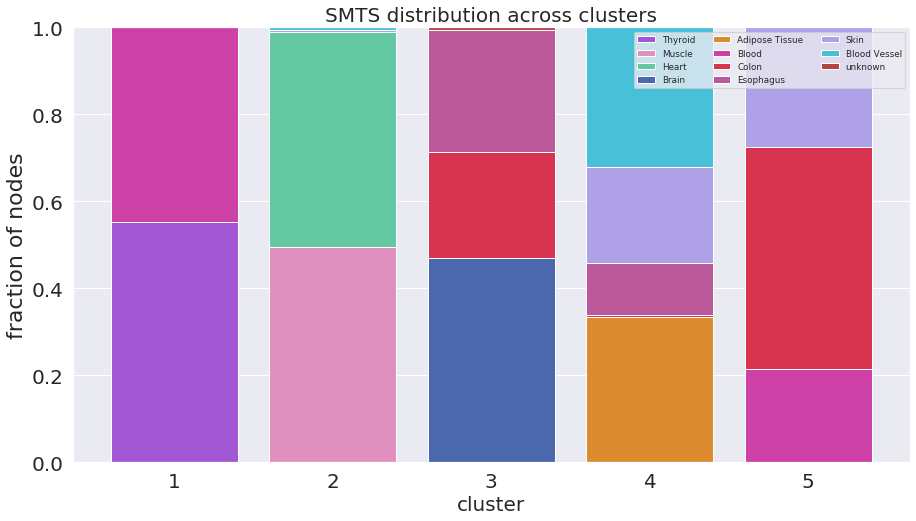

must shuffle files
True SMTS 1
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bd985708>
error in GTEX-1JJ6O-0011-R11b-SM-EXUS2
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bd985708>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


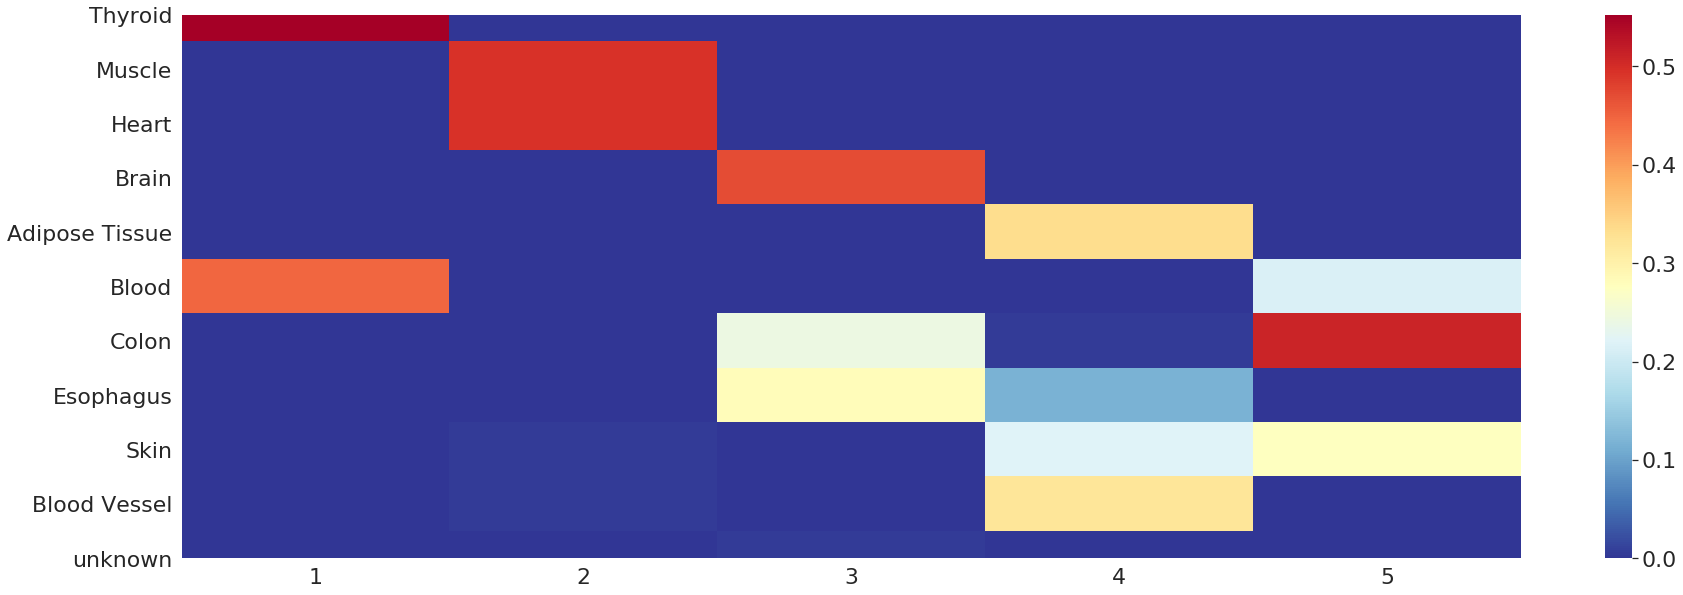

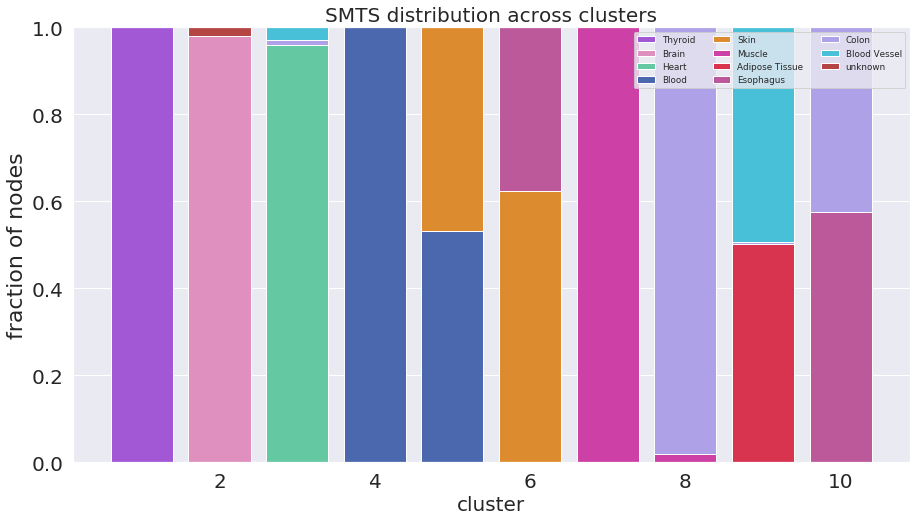

must shuffle files
True SMTS 0
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bdb51f08>
error in GTEX-1IY9M-0011-R7a-SM-D4P49
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bdb51f08>
error in GTEX-1B8SF-0011-R6b-SM-7MXUD
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bdb51f08>
error in GTEX-1HGF4-0011-R5b-SM-CM2ST
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8bdb51f08>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


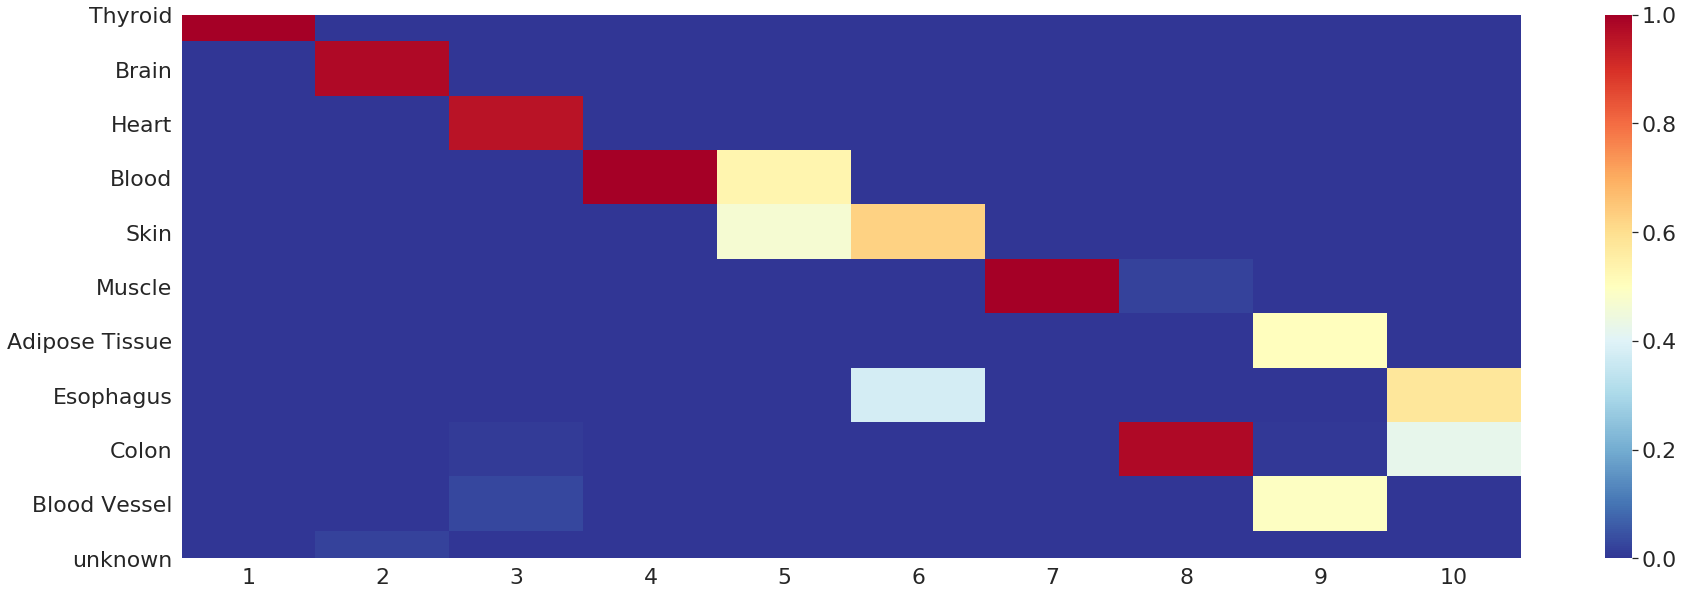

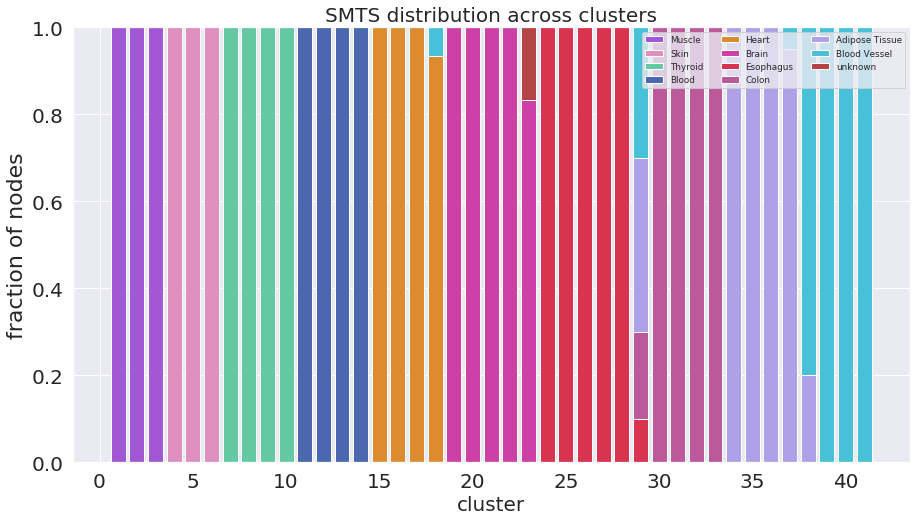

must shuffle files
False SMTS 2
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8625548>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


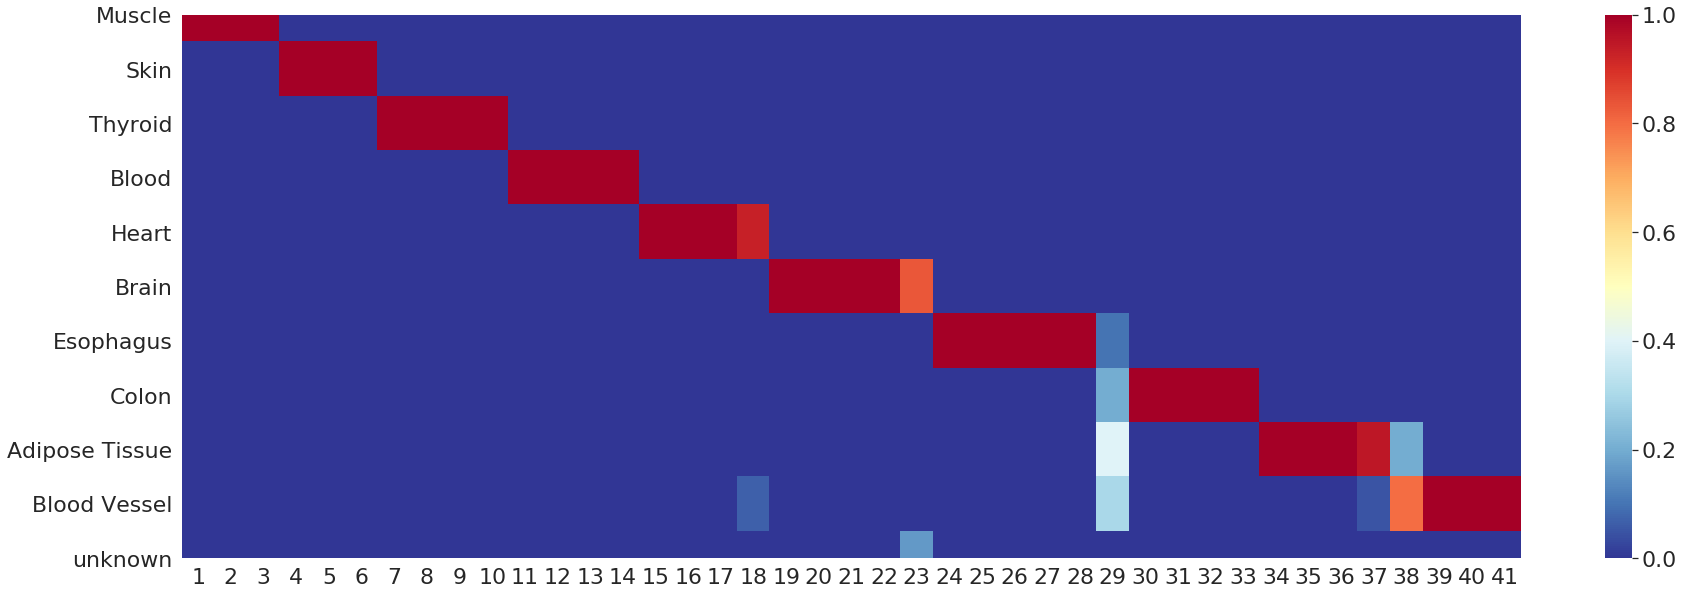

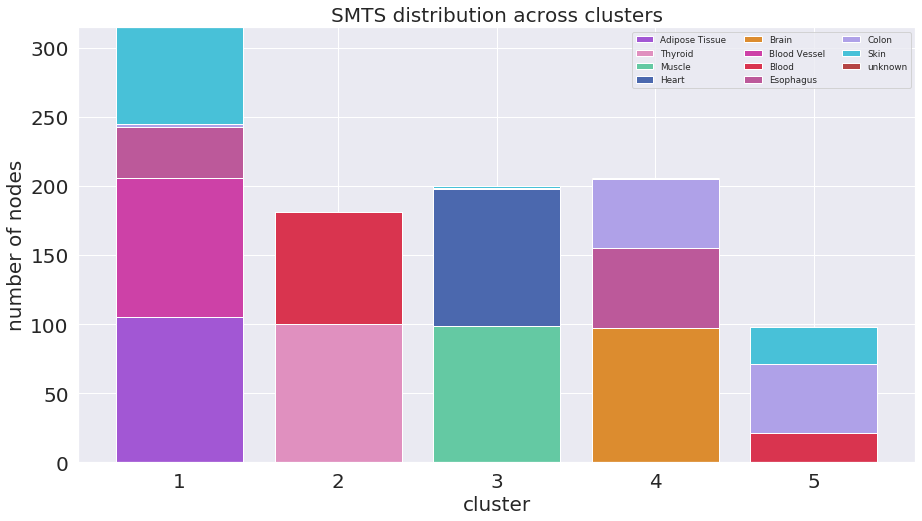

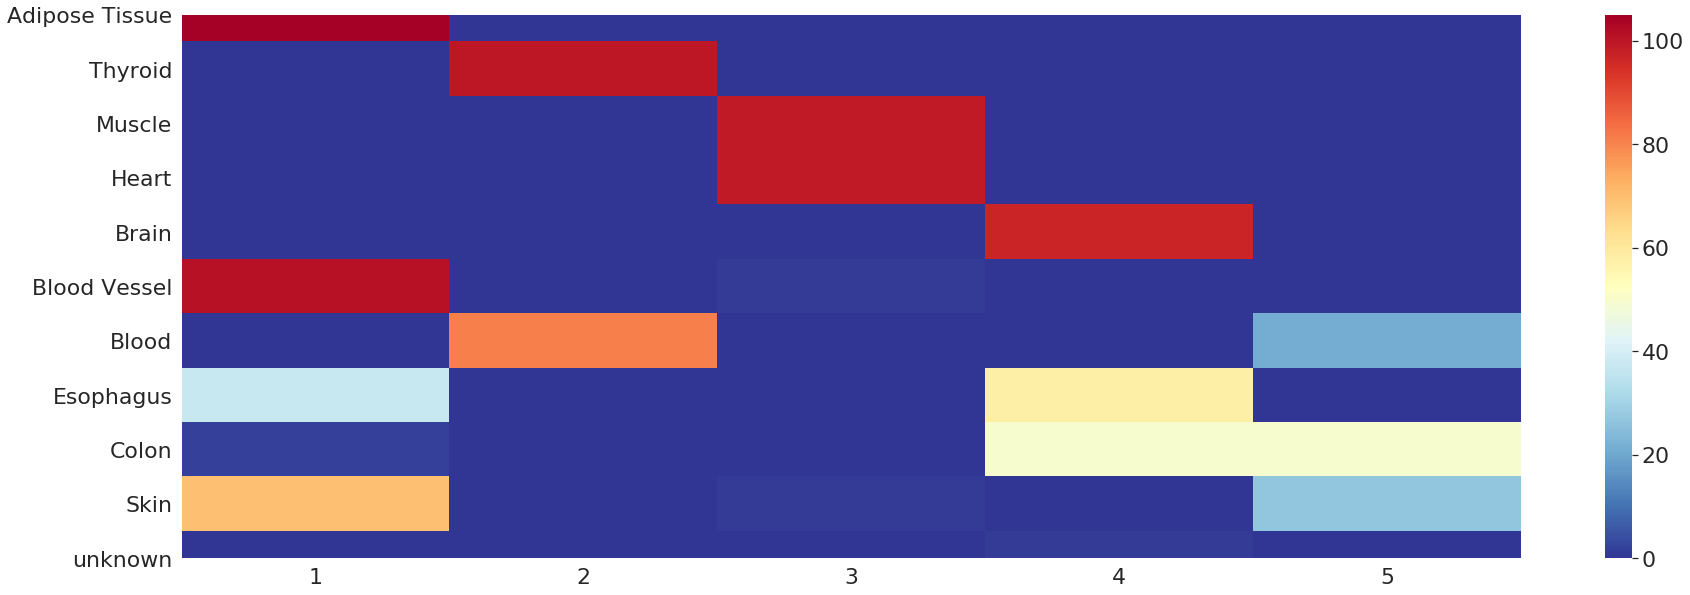

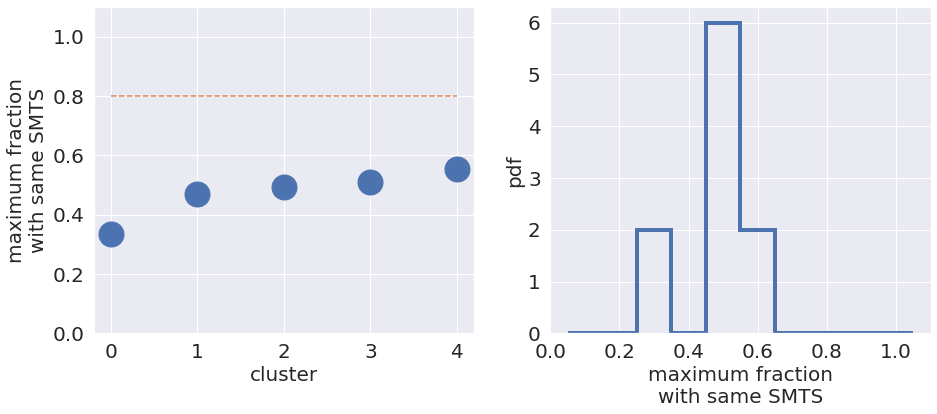

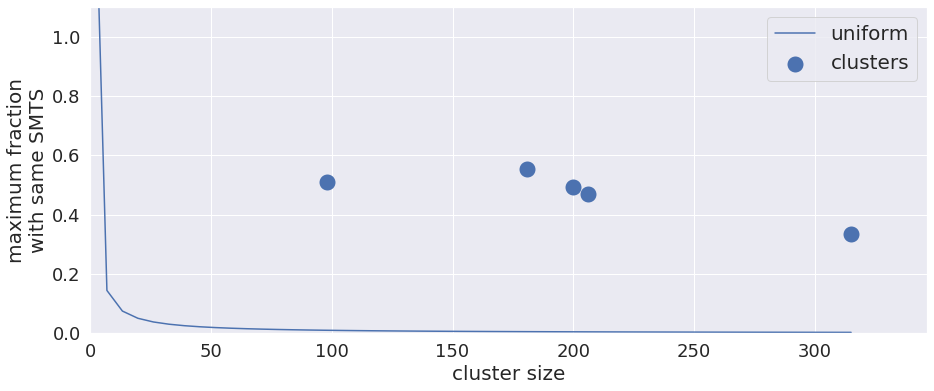

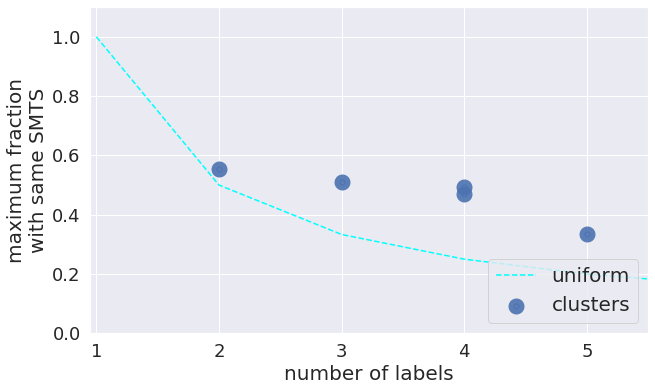

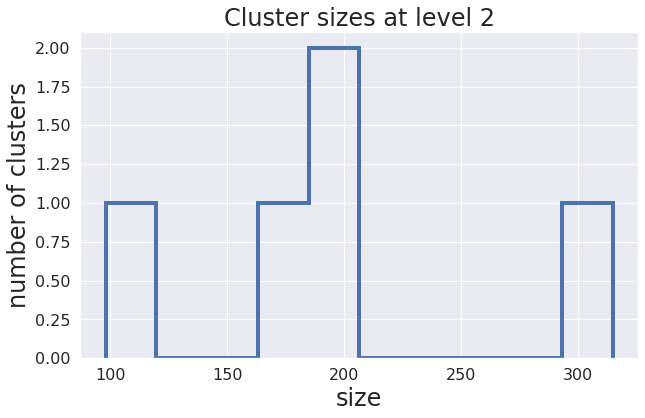

must shuffle files
False SMTS 1
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b859fac8>
error in GTEX-1JJ6O-0011-R11b-SM-EXUS2
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b859fac8>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


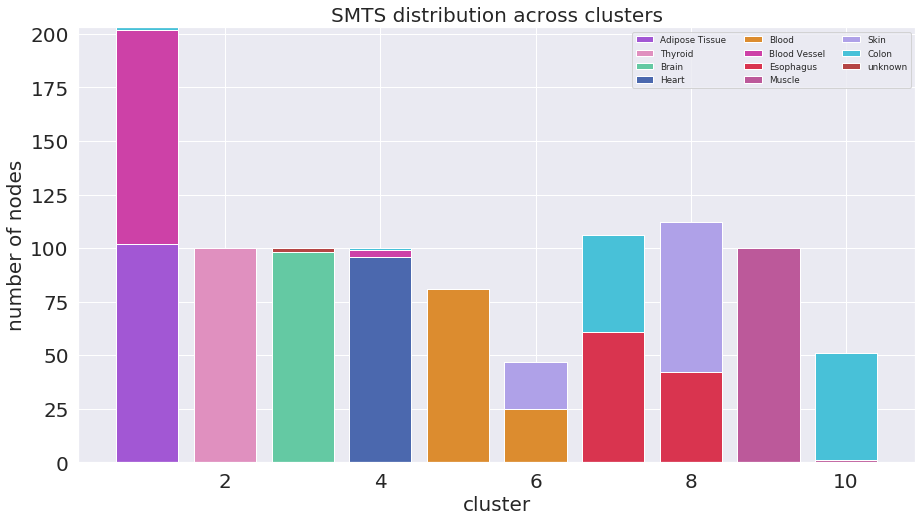

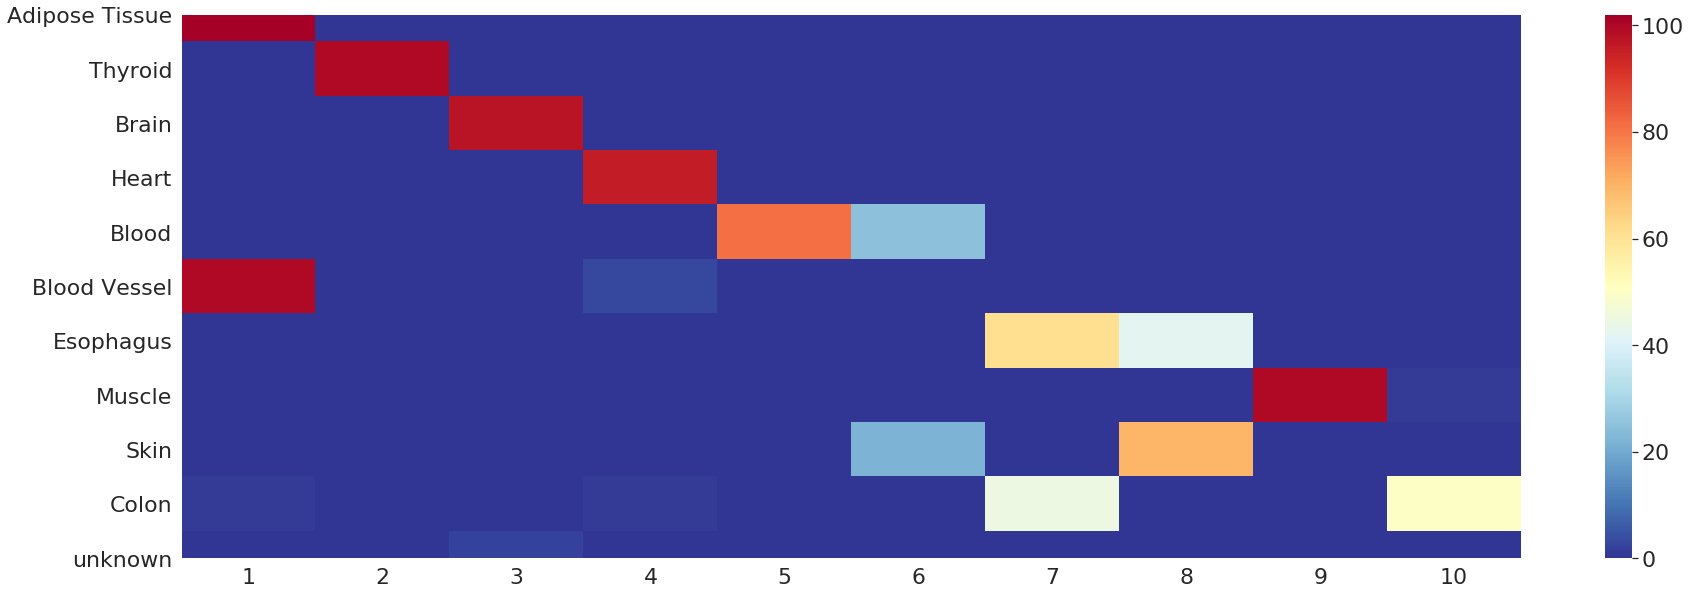

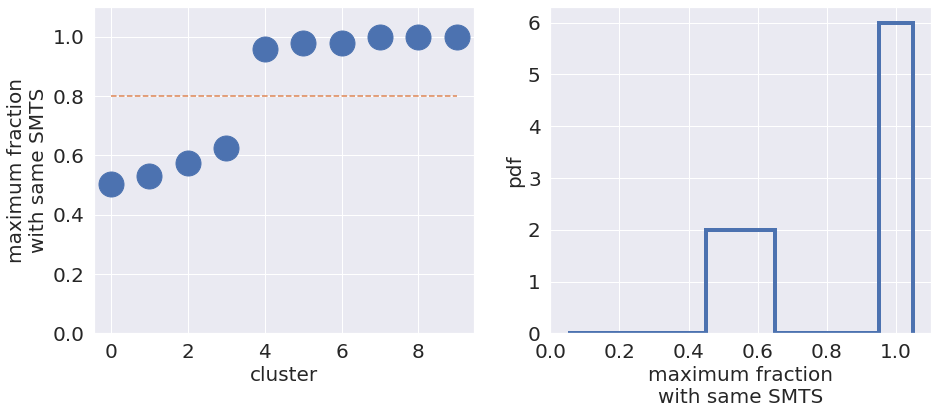

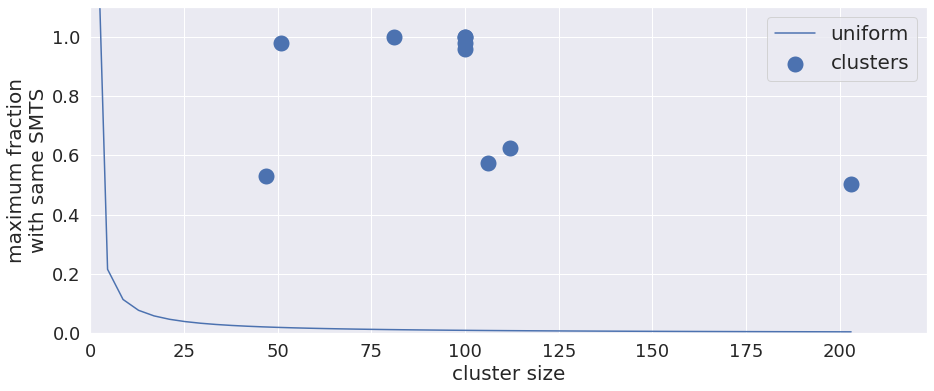

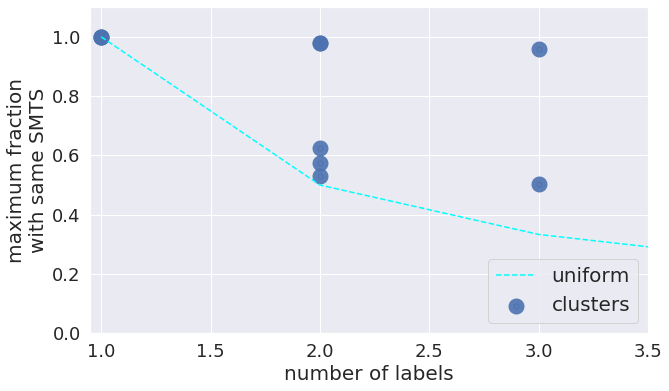

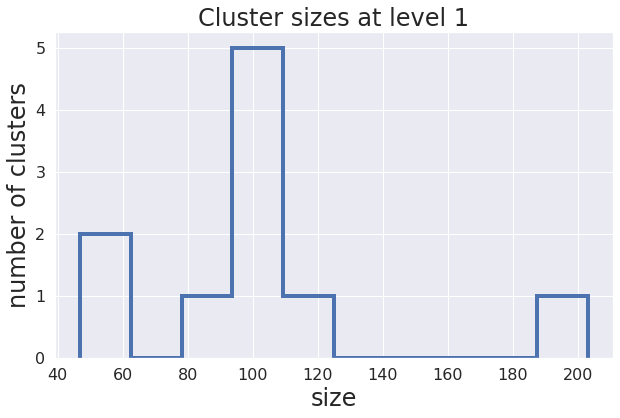

must shuffle files
False SMTS 0
error in GTEX-1GZ2Q-0011-R6a-SM-9OSWM
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8b3e1c8>
error in GTEX-1IY9M-0011-R7a-SM-D4P49
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8b3e1c8>
error in GTEX-1B8SF-0011-R6b-SM-7MXUD
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8b3e1c8>
error in GTEX-1HGF4-0011-R5b-SM-CM2ST
<class 'UnboundLocalError'> local variable 'foundsample' referenced before assignment <traceback object at 0x7fe8b8b3e1c8>


/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/lib/function_base.py:390: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/fvalle/anaconda3/envs/phd/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


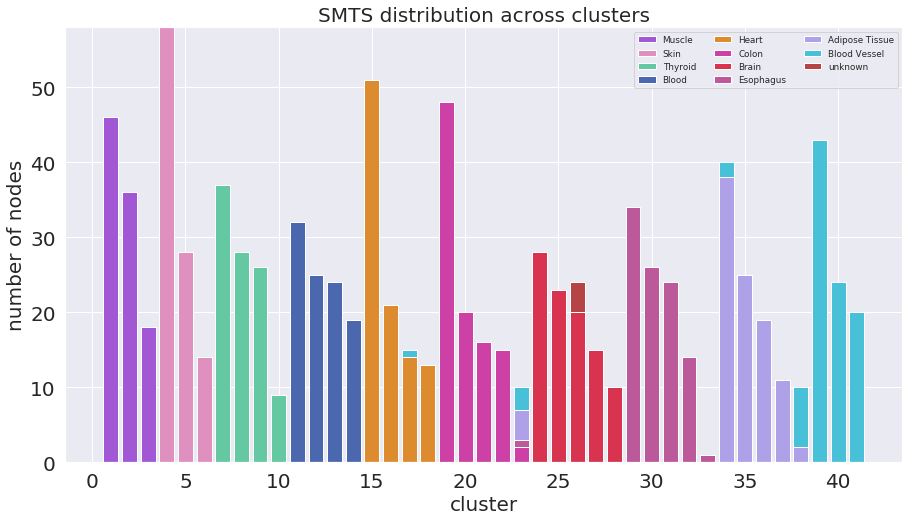

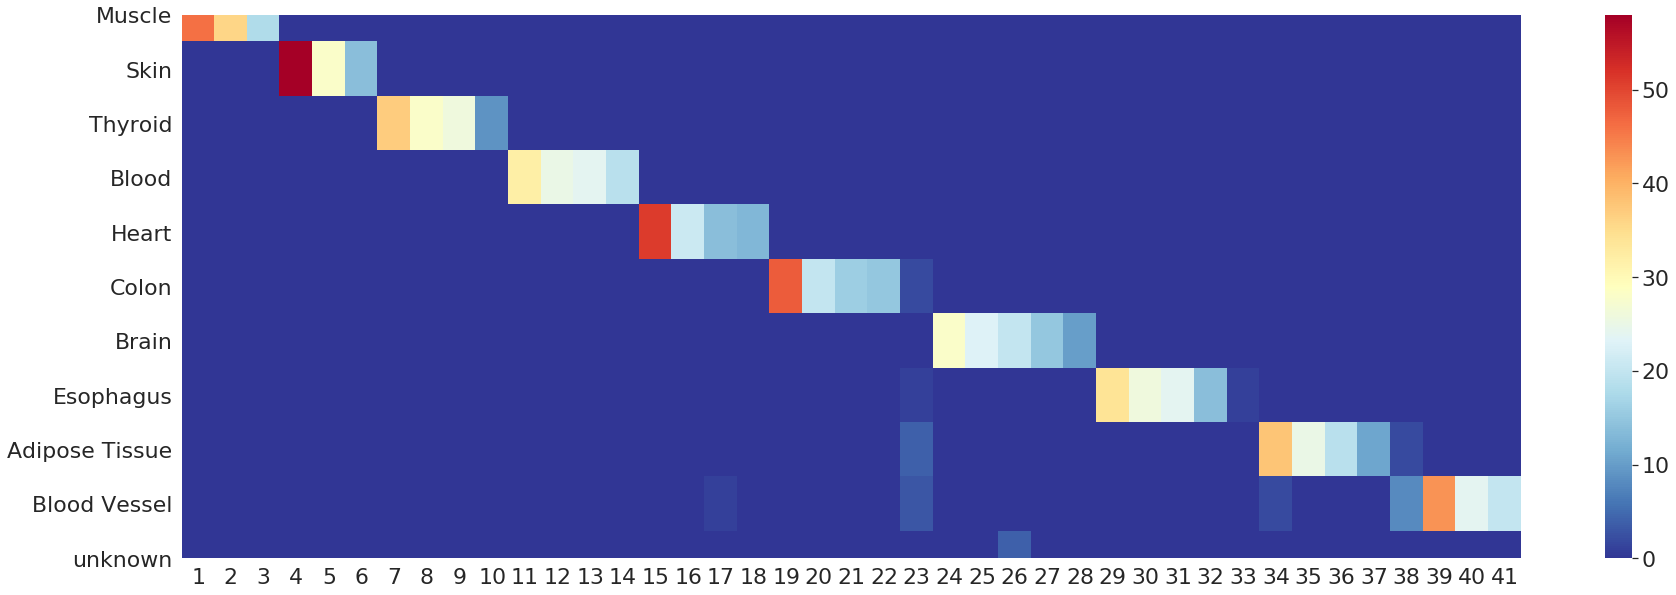

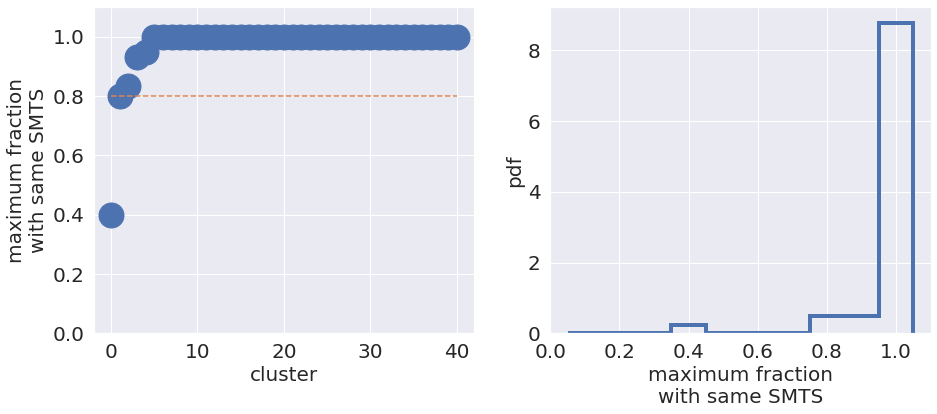

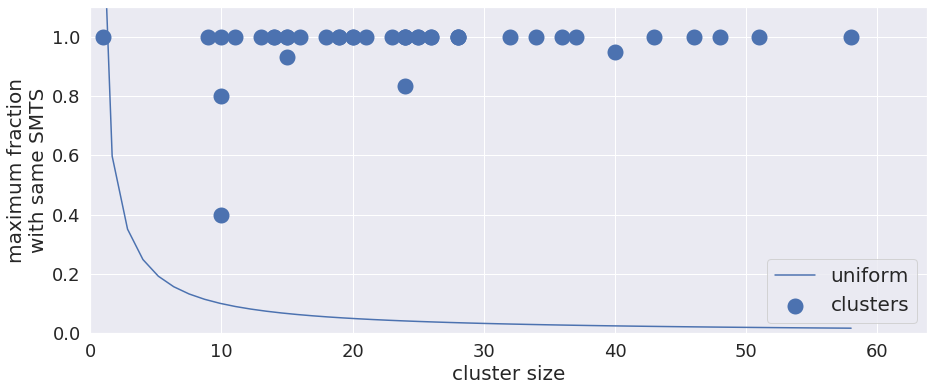

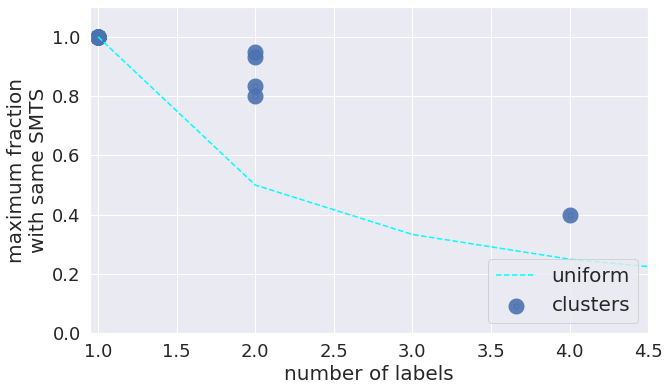

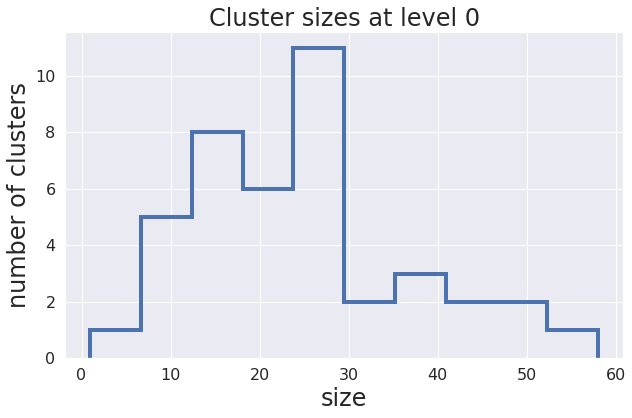

must shuffle files


In [6]:
for normalise in [True, False]:
    for label in labels:
        for level in np.arange(L+1)[::-1]:
            if level==0:
                pass
                #continue
            print(normalise, label, level)
            try:
                cluster = get_cluster_given_l(level, directory,algorithm=algorithm)
                fraction_sites = get_fraction_sites(cluster,df_files=df_files,label=label, normalise=normalise)

                #fsdf = pd.DataFrame(data=fraction_sites)
                #fsdf = fsdf.drop('Other', axis=1)
                #fsdf = fsdf.divide(fsdf.sum(axis=1), axis=0).fillna(0)
                #fraction_sites = fsdf.sort_values(by=fsdf.columns.to_list(), ascending=True).to_dict(orient='list')

                clustersinfo = get_clustersinfo(cluster,fraction_sites)
                plot_cluster_composition(fraction_sites,directory,level,label=label, normalise=normalise,algorithm=algorithm)
                make_heatmap(fraction_sites, directory, label, level, normalise=normalise,algorithm=algorithm)

                clustersinfo = get_clustersinfo(cluster,fraction_sites)            
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level, directory,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,algorithm=algorithm)
                    plot_sizes(level,directory, algorithm=algorithm)
            except:
                print(*sys.exc_info())
            try:
                fraction_sites_shuffle = get_fraction_sites(cluster, pd.read_csv("%s/files_shuffles.dat"%directory, index_col=[0]),label=label, normalise=normalise)
                clustersinfo_shuffle = get_clustersinfo(cluster, fraction_sites_shuffle)
                plot_cluster_composition(fraction_sites_shuffle,directory,level, label=label, shuffled=True, normalise=normalise)
                if not normalise:
                    plot_maximum(clustersinfo,cluster,label,level,directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_maximum_label(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
                    plot_labels_size(clustersinfo,label,level, directory,clustersinfo_shuffle,algorithm=algorithm)
            except:
                print("must shuffle files")

In [ ]:
##useful for R clustree plot
def reindex(x):
    i=1
    last=x[0]
    new = []
    for xi in x:
        if xi == last:
            pass
        else:
            i+=1
            last=xi
        new.append(i)
    return new

df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,L), header=[0])
df_labels = pd.DataFrame()
shape = df_clusters.dropna().shape
files = df_clusters.dropna().values.reshape(shape[0]*shape[1],)
for level in np.arange(L+1)[:0:-1]:
    print(level)
    df_clusters = pd.read_csv("%s/%s/%s_level_%d_clusters.csv"%(directory,algorithm,algorithm,level), header=[0])
    currentlevellabels = []
    for file in files:
        s = df_clusters[df_clusters.isin([file])].any(0)
        a = s.index[s]
        currentlevellabels.append(int(a[0][8:])-1)
    df_labels.insert(0,'l%d'%level,currentlevellabels)
    del currentlevellabels
filelabels = []
filesublabels = []
for file in files:
    try:
        filelabels.append(get_file(file, df_files)[labels[0]])
        filesublabels.append(get_file(file, df_files)[labels[1]])
    except:
        filelabels.append('unknown')
        filesublabels.append('unknown')
        print(*sys.exc_info())
df_labels.insert(0,'tissue', filelabels)
df_labels.insert(0,'subtissue', filesublabels)
df_labels.sort_values(by=['tissue','subtissue'], inplace=True)
df_labels.sort_values(by=["l%d"%l for l in np.arange(L+1)[:0:-1]], axis=0, inplace=True)
filelabels = df_labels['tissue']
filesublabels = df_labels['subtissue']
df_labels = df_labels.apply(reindex, axis=0)
df_labels['tissue']=filelabels
df_labels['subtissue']=filesublabels
df_labels.to_csv("%s/%s/topsbm_labels.csv"%(directory,algorithm), index=False, header=True)

In [7]:
if "clustersizes.txt" in os.listdir(directory):
    with open("%s/clustersizes.txt"%directory, 'r') as f:
        xl=np.array(f.read().split()).astype(int)
else:
    try:
        xl = getclustersizesarray(directory, L)
        with open("%s/clustersizes.txt" % directory, 'w') as f:
            for x in xl:
                f.write("%d\n" % x)
    except:
        print(*sys.exc_info())
        print("cannot save clustersizes.txt")

if "topicsizes.txt" in os.listdir(directory):
    with open("%s/topicsizes.txt"%directory) as f:
        tl=np.array(f.read().split()).astype(int)
else:
    try:
        tl = gettopicsizesarray(directory, L)
        with open("%s/topicsizes.txt" % directory, 'w') as f:
            for x in tl:
                f.write("%d\n" % x)
    except:
        print("cannot save topicsizes.txt")

In [71]:
scores = get_scores(directory, labels, verbose=False)
scores['hsbm'] = scores['SMTS']

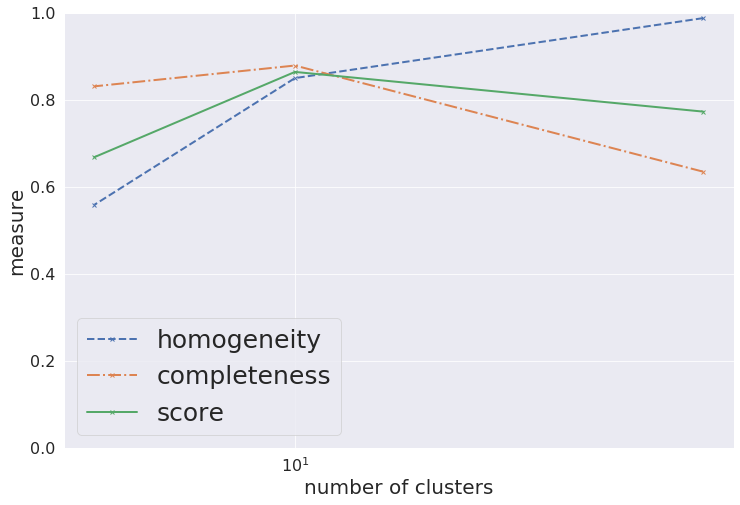

In [76]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
#add_score_lines(ax,scores,[labels[0]],xl, h=True, c=True, alpha=1)
h = np.array(scores['hsbm']['h'])
c = np.array(scores['hsbm']['c'])
ax.plot(scores['hsbm']['xl'],h, marker='x', ls='--', lw=2, label='homogeneity')
ax.plot(scores['hsbm']['xl'],c, marker='x', ls='-.', lw=2,label='completeness')
ax.plot(scores['hsbm']['xl'],scores['hsbm']['V'], marker='x', ls='-', lw=2, label='score')
ax.set_xscale('log')
ax.set_ylim(0,1)
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=25)
plt.xlabel('number of clusters', fontsize=20)
plt.ylabel('measure', fontsize=20)
plt.show()
fig.savefig("%s/metric_scores_primarysite.pdf"%(directory))

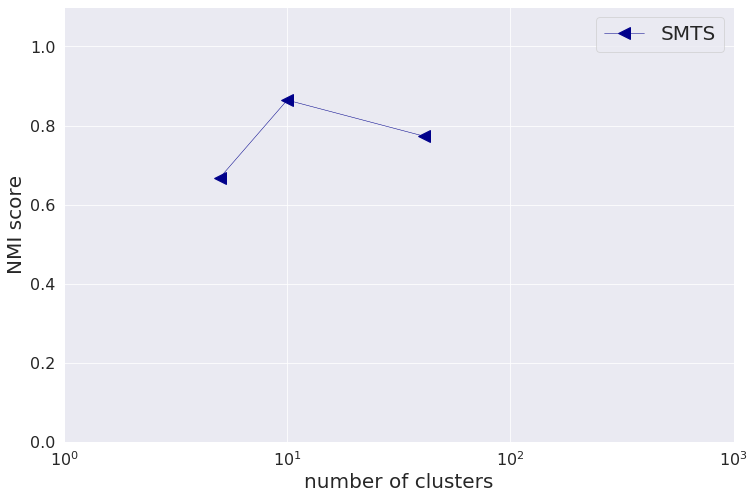

In [73]:
fig=plt.figure(figsize=(12,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,['SMTS'])
#h = np.array(scores['primary_site']['h'])
#c = np.array(scores['secondary_site']['c'])
#ax.plot(xl, 2*h*c/(h+c), ls='-',c='g')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(1,1000)
plt.show()
fig.savefig("%s/metric_scores.pdf"%(directory))

In [77]:
scores = {}
scores['hsbm'] = get_scores(directory, labels, df_files=df_files, verbose=False)['SMTS']
scores['hierarchical'] = get_scores(directory, labels, algorithm='hierarchical', verbose=False)['SMTS']
scores['lda'] = get_scores(directory, labels, algorithm='lda', verbose=False)['SMTS']
#scores['kmeans'] = get_scores(directory, labels, algorithm='kmeans', verbose=False)['SMTS']
#scores['tm']=get_scores(directory, labels, algorithm='tm', verbose=False)['primary_site']
#scores['cc']=get_scores(directory, labels, algorithm='cc', verbose=False)['primary_site']
#scores['shuffle'] = get_scores_shuffled(directory, df_files,label='primary_site', algorithm='lda')
#scores['wgcna']=get_scores(directory, labels, algorithm='wgcna', verbose=False)['primary_site']

In [ ]:
scores['hierarchical'] = get_scores(directory, labels, algorithm='hierarchical', verbose=False)['primary_site']
scores['hierarchicaleuclidean'] = get_scores(directory, labels, algorithm='hierarchicaleuclidean', verbose=False)['primary_site']
scores['lda'] = get_scores(directory, labels, algorithm='lda', verbose=False)['primary_site']
#scores['hsbm->hierachical'] = pd.read_csv("%s/hierhsbm.scores"%directory).to_dict(orient='list')
scores['hsbm'] =  get_scores(directory, labels, algorithm='topsbm', verbose=False)['primary_site']
scores['tm']=get_scores(directory, labels, algorithm='tm', verbose=False)['primary_site']
scores['wgcna']=get_scores(directory, labels, algorithm='wgcna', verbose=False)['primary_site']
scores['cc']=get_scores(directory, labels, algorithm='cc', verbose=False)['primary_site']
scores['shuffle'] = get_scores_shuffled(directory, df_files,label='primary_site', algorithm='topsbm')

No score for tm
No score for wgcna
No score for shuffle


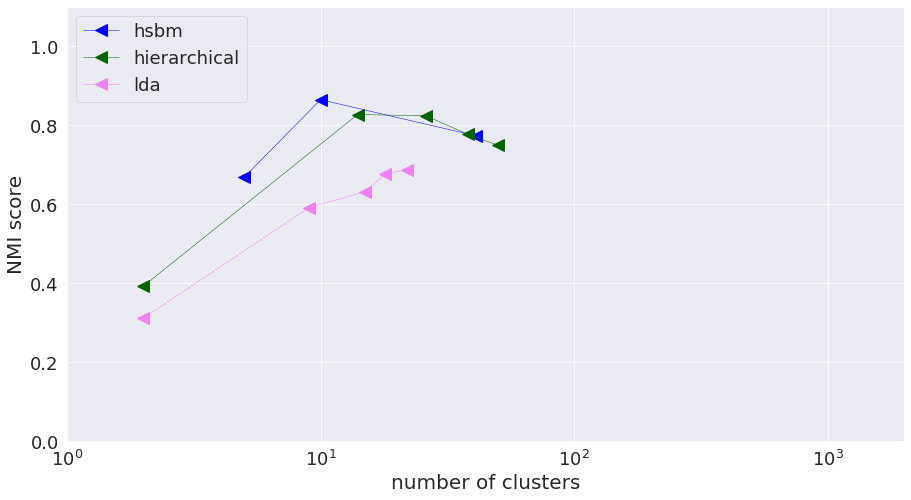

In [78]:
fig=plt.figure(figsize=(15,8))
ax = fig.subplots(1)
add_score_lines(ax,scores,labels=['hsbm', 'tm', 'hierarchical', 'lda', 'wgcna', 'shuffle'])
plt.tick_params(labelsize=18)
#ax.set_xscale('linear')
plt.xlim(1,2000)
plt.legend(ncol=1, fontsize=18,loc='upper left' )
plt.show()
fig.savefig("%s/metric_scores_all.pdf"%(directory))

# Benchmark
https://scikit-learn.org/stable/modules/clustering.html

In [ ]:
true_labels = []
predicted_labels = []
for c in cluster:
    print(c)
    for sample in cluster[c]:
        #true_labels.append(getFile(sample)['primary_site'].values[0])
        try:
            true_labels.append(df_files.loc[sample][label])
            predicted_labels.append(c)
        except:
            print("error in %s"%sample)

In [ ]:
_, labels_true = np.unique(true_labels,return_inverse=True)

In [ ]:
series_metrics=pd.Series(name=setup+'__level_%d_%s'%(level,label))
series_metrics['MI']=metrics.cluster.normalized_mutual_info_score(labels_true, predicted_labels, average_method='arithmetic')
series_metrics['Homogeneity']=metrics.cluster.homogeneity_score(labels_true, predicted_labels) 
series_metrics['Completness']=metrics.cluster.completeness_score(labels_true, predicted_labels) 
series_metrics['Vmeasure']=metrics.cluster.v_measure_score(labels_true, predicted_labels)
series_metrics['Fowlkes-Mallows']=metrics.cluster.fowlkes_mallows_score(labels_true,predicted_labels)
series_metrics['AdjustedRandIndex']=metrics.cluster.adjusted_rand_score(labels_true,predicted_labels)

In [ ]:
series_metrics

In [ ]:
#df_metrics = pd.DataFrame(columns=['AdjustedRandIndex','MI','Homogeneity','Completness','Vmeasure','Fowlkes-Mallows'])

In [ ]:
try:
    df_metrics.append(series_metrics, ignore_index=False, verify_integrity=True).to_csv("results/hSBM/metrics.csv", index=True,header=True)
except:
    raise

In [ ]:
df_metrics = pd.read_csv("results/hSBM/metrics.csv", index_col=[0],header=[0])
df_metrics.sort_values(by=['MI','Homogeneity'], ascending=False, axis=0, inplace=True)
df_metrics.round(decimals=2)

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(24, 20)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = pd.plotting.table(ax, df_metrics.round(decimals=2), loc='upper right', colWidths=[0.12]*len(df_metrics.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1, 2) # change size table
plt.savefig('results/hSBM/metrics.pdf', transparent=True)

In [ ]:
metrics.cluster.contingency_matrix(true_labels, predicted_labels)

In [ ]:
df_files[df_files['primary_site']=='Brain']